In [1]:
from __future__ import division
import numpy
import matplotlib.pyplot as pyplot
from Inputs import get_data
import plotly.plotly as plotly
%matplotlib inline

### 16/12/16
Continuing work on the excited state polarisation spectrum. Realised yesterday that the 852 pump light for the ground state transition is NOT the same as the 852 pump light for the excited state transition! So when I thought I was increasing the pump power I was actually decreasing the pump power for the excited state and increasing the pump for the ground state... oops!

Try looking at data again with correct values of pump power!

In [4]:
folder = 'Scope151216'
times, both_45_all = get_data(folder, 'C2', 'both1470_45',10, True)
both_45 = numpy.average(both_45_all, axis=0)

In [5]:
both_66_all = get_data(folder, 'C2', 'both1470_66', 10)
both_66 = numpy.average(both_66_all, axis = 0)

In [6]:
both_85_all = get_data(folder, 'C2', 'both1470_85', 10)
both_85 = numpy.average(both_85_all, axis = 0)

In [7]:
both_97_all = get_data(folder, 'C2', 'both1470_97', 10)
both_97 = numpy.average(both_97_all, axis = 0)

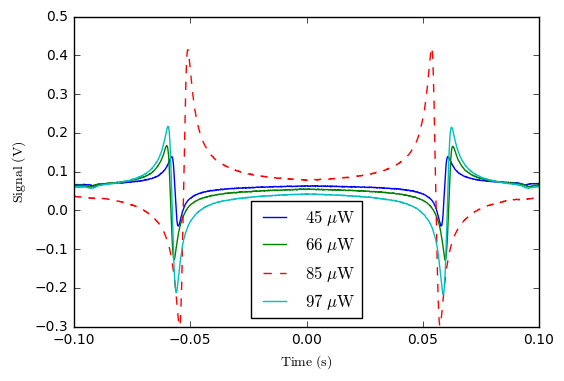

In [14]:
pyplot.figure()
pyplot.plot(times, both_45, label = r'$45\ \rm{\mu W}$')
pyplot.plot(times, both_66, label = r'$66\ \rm{\mu W}$')
pyplot.plot(times, both_85, linestyle = 'dashed', label = r'$85\ \rm{\mu W}$')
pyplot.plot(times, both_97, label = r'$97\ \rm{\mu W}$')
pyplot.xlim([times[0], times[-1]])
pyplot.xlabel(r'$\rm{Time\ (s)}$')
pyplot.ylabel(r'$\rm{Signal\ (V)}$')
pyplot.legend(loc=0)
pyplot.show()

The $85\ \rm{\mu W}$ measurement was the first measurement taken, after which I noticed the 852 laser had come unlocked. This may account for the unusual size of this trace if the 852 laser was not locked at this point. Except for this we see the feature height increase with increasing pump powers.

Disregarding the $85\ \rm{\mu W}$ measurement and focussing on only half of the scan we can more closely see the evolution with pump power.

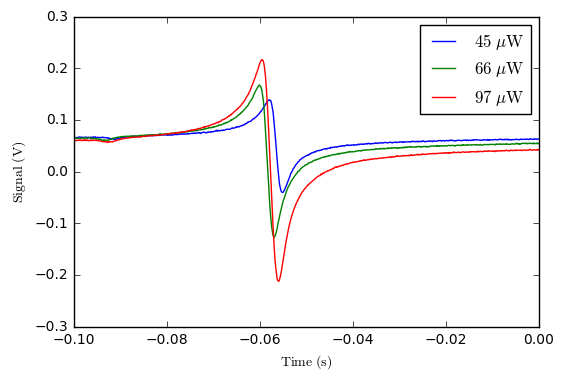

In [15]:
pyplot.figure()
pyplot.plot(times, both_45, label = r'$45\ \rm{\mu W}$')
pyplot.plot(times, both_66, label = r'$66\ \rm{\mu W}$')
pyplot.plot(times, both_97, label = r'$97\ \rm{\mu W}$')
pyplot.xlim([times[0], 0])
pyplot.xlabel(r'$\rm{Time\ (s)}$')
pyplot.ylabel(r'$\rm{Signal\ (V)}$')
pyplot.legend(loc=0)
pyplot.show()

The features have drifted slightly from the zero set point but are largely as expected. Should the $97\ \rm{\mu W}$ trace have been slightly further to the left? Also still seeing the small feature on the far left ($t \approx 0.09\ \rm{s}$). Does this also change with pump power?

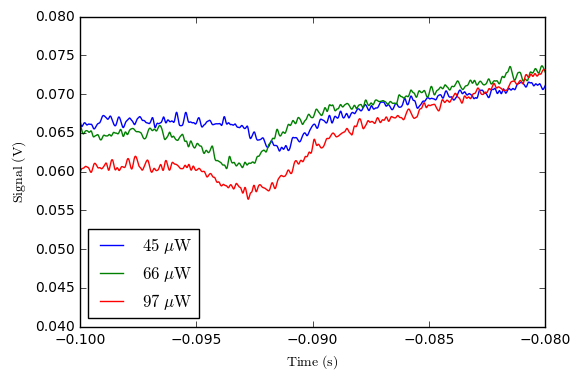

In [19]:
pyplot.figure()
pyplot.plot(times, both_45, label = r'$45\ \rm{\mu W}$')
pyplot.plot(times, both_66, label = r'$66\ \rm{\mu W}$')
pyplot.plot(times, both_97, label = r'$97\ \rm{\mu W}$')
pyplot.xlim([times[0], -0.08])
pyplot.ylim([0.04,0.08])
pyplot.xlabel(r'$\rm{Time\ (s)}$')
pyplot.ylabel(r'$\rm{Signal\ (V)}$')
pyplot.legend(loc=0)
pyplot.show()

Seems to follow the same pattern as the main feature; the feature is larger and shifted to the left for increasing pump powers. See if it is visible when we plot transmission (left - right).

In [24]:
pump_powers = [45,66,97]
for p in pump_powers:
    globals()['left_all_'+str(p)] = get_data(folder, 'C2', 
                                             'left1470_'+str(p), 10)
    globals()['right_all_'+str(p)] = get_data(folder, 'C2', 
                                              'right1470_'+str(p), 10)

In [25]:
for p in pump_powers:
    globals()['left_'+str(p)] = numpy.average(globals()['left_all_'+str(p)], 
                                              axis=0)
    globals()['right_'+str(p)] = numpy.average(globals()['right_all_'+str(p)], 
                                               axis=0)
    globals()['trans_'+str(p)] = (globals()['left_'+str(p)] - 
                                  globals()['right_'+str(p)])/2

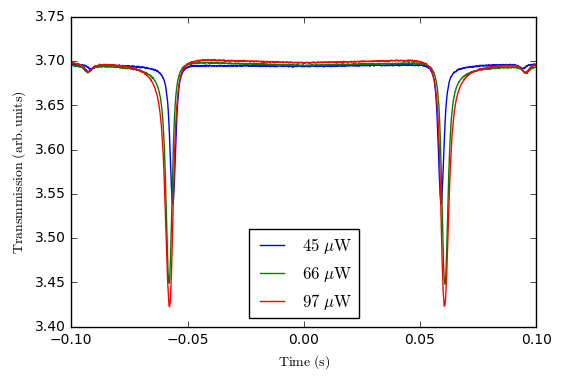

In [28]:
pyplot.figure()
pyplot.plot(times, trans_45, label = r'$45\ \rm{\mu W}$')
pyplot.plot(times, trans_66, label = r'$66\ \rm{\mu W}$')
pyplot.plot(times, trans_97, label = r'$97\ \rm{\mu W}$')
pyplot.xlim([times[0], times[-1]])
pyplot.legend(loc=0)
pyplot.xlabel(r'$\rm{Time\ (s)}$')
pyplot.ylabel(r'$\rm{Transmmission\ (arb. units)}$')
pyplot.show()

Again the features get larger with increasing pump power (more absorption), and the little feature is still there! Maybe there is another ${F'} \rightarrow {F''}$ transition that corresponds to this feature? Large feature is the $6^2P_{3/2}\ |F' = 5, m_{F'} = 5\rangle \rightarrow 7^2S_{1/2}\ |F'' = 4, m_{F''} = 4\rangle$ transition. Is it possible that there is some light driving transitions from $6^2P_{3/2}\ |F' = 5, m_{F'} \neq 5\rangle$?